# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata,study_results, how = 'inner', on = 'Mouse ID' )

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
merged_df.groupby(['Mouse ID']).count()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_df[merged_df.duplicated(subset = ['Mouse ID','Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
Du_mouse = merged_df.loc[merged_df['Mouse ID'] == 'g989']
Du_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Clean_df = merged_df.drop_duplicates(subset = ['Mouse ID','Timepoint'])
Clean_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)

In [7]:
# Checking the number of mice in the clean DataFrame.
#Clean_df = Clean_df['Timepoint']
Clean_df.groupby(['Mouse ID']).count()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

Drug_df = Clean_df.groupby(['Drug Regimen'])

Mean_TV_df = Drug_df['Tumor Volume (mm3)'].mean()

Median_TV_df = Drug_df['Tumor Volume (mm3)'].median()

Var_TV_df = Drug_df['Tumor Volume (mm3)'].var()

Std_TV_df = Drug_df['Tumor Volume (mm3)'].std()

Sem_TV_df = Drug_df['Tumor Volume (mm3)'].sem()



# Assemble the resulting series into a single summary DataFrame.

Summary_TV_df = pd.merge(Mean_TV_df , Median_TV_df , how = 'inner' , on = 'Drug Regimen')

Summary_TV_df = pd.merge(Summary_TV_df , Var_TV_df , how = 'inner' , on = 'Drug Regimen')

Summary_TV_df = pd.merge(Summary_TV_df , Std_TV_df , how = 'inner' , on = 'Drug Regimen' , suffixes = ('','_z'))

Summary_TV_df = pd.merge(Summary_TV_df , Sem_TV_df , how = 'inner' , on = 'Drug Regimen' , suffixes = ('','_t'))

Summary_TV_df.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance','Tumor Volume Std. Dev.','Tumor Volume Std. Err.']

Summary_TV_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Summary_TV_df = Drug_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean Tumor Volume','median': 'Median Tumor Volume','var': 'Tumor Volume Variance','std': 'Tumor Volume Std. Dev.','sem': 'Tumor Volume Std. Err.'})

Summary_TV_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

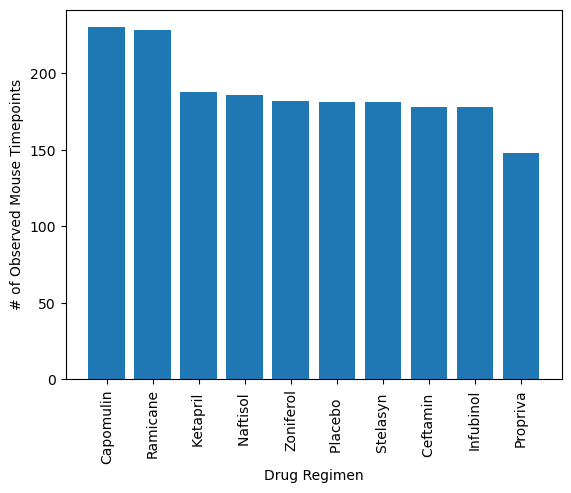

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

x_axys = np.arange(len(Drug_df['Drug Regimen']))
tick_locations = []
for x in x_axys:
    tick_locations.append(x)

    

Drg_TP_df = Drug_df['Timepoint'].count()

Drg_TP_df = Drg_TP_df.sort_values(ascending=False)

Values = Drg_TP_df.tolist()

Drugs = ['Capomulin','Ramicane','Ketapril ','Naftisol ','Zoniferol','Placebo  ','Stelasyn ','Ceftamin ','Infubinol','Propriva']  



plt.bar(x_axys , Drg_TP_df , align="center")
plt.xticks( tick_locations , Drugs , )
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.show()


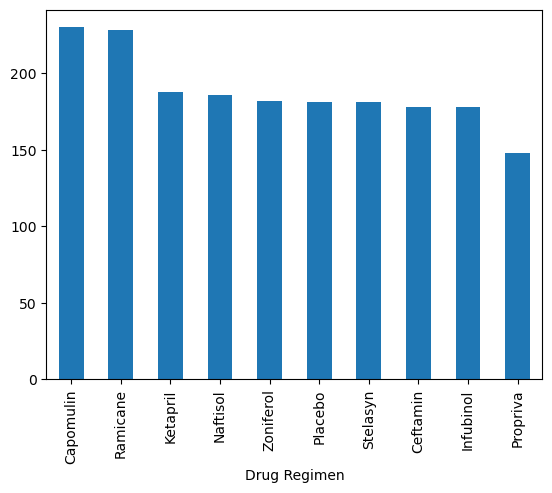

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

Drg_TP_df.plot(kind = 'bar')


plt.show()

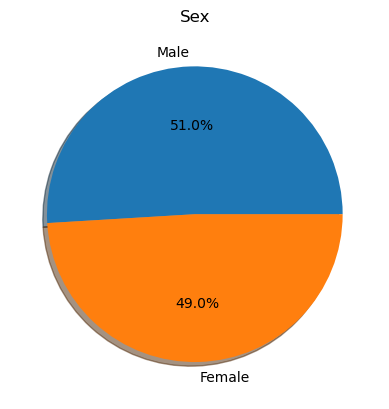

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Mal_Fmal = Clean_df['Sex'].value_counts().tolist()
Sex = Clean_df['Sex'].unique()


plt.pie(Mal_Fmal , labels=Sex , autopct="%1.1f%%", shadow=True )
plt.gca().set_title('Sex')
plt.show()

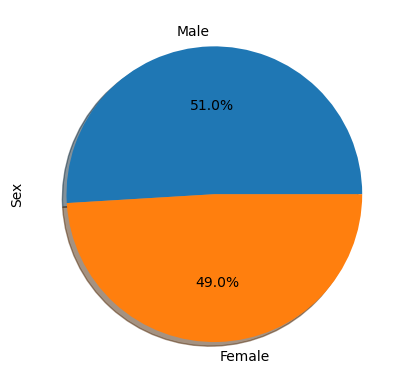

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
MO_sex_df = Clean_df['Sex'].value_counts()
MO_sex_df.plot(kind='pie', labels=Sex , autopct='%1.1f%%', shadow=True ,  ylabel = 'Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
MaxTP_df = Clean_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Final_df = pd.merge(Clean_df,MaxTP_df, how = 'left' , on = 'Mouse ID', suffixes = ('','_z'))
Final_df.rename(columns ={'Timepoint_z': 'Max Timeoint'} , inplace = True )
Final_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timeoint
1758,x581,Ceftamin,Female,19,28,35,58.077583,3,45
515,a492,Stelasyn,Male,20,25,5,46.409143,0,45
1257,o331,Ketapril,Male,24,30,10,50.128455,1,45
1107,l558,Ceftamin,Female,13,30,0,45.000000,0,10
396,e662,Ramicane,Male,8,24,25,44.664594,1,45
1734,x264,Naftisol,Female,21,27,15,50.002314,1,40
1298,o809,Infubinol,Male,3,25,30,54.832629,1,35
950,i669,Placebo,Female,18,27,0,45.000000,0,25
1054,k754,Zoniferol,Female,8,26,15,51.323570,0,20
175,i177,Ramicane,Male,10,18,0,45.000000,0,45


In [99]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for index, row in Final_df.iterrows():
    if row['Drug Regimen'] in Treatments:
        Volumes.append(row['Tumor Volume (mm3)'])
   
    # add subset 
    
# Determine outliers using upper and lower bounds

LQ = np.percentile(Max_Volumes, 25)
HQ = np.percentile(Max_Volumes, 75)
IQR = HQ - LQ


low_b = LQ - 1.5 * IQR
up_b = HQ + 1.5 * IQR


outliers = [vol for vol in Volumes if vol < low_b or vol > up_b]



print("Interquartile range (IQR):", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("Outliers:", outliers)

Interquartile range (IQR): 10.136299842500009
Lower bound: 25.015721023749983
Upper bound: 65.56092039375002
Outliers: [24.36550471, 22.05012627, 23.34359787, 67.97341878, 66.08306589, 67.82141969, 69.42814095, 72.2267309, 67.28962147, 66.62283628, 68.92318457, 66.19691151, 67.74866174, 67.52748237, 67.68556862, 68.59474498]


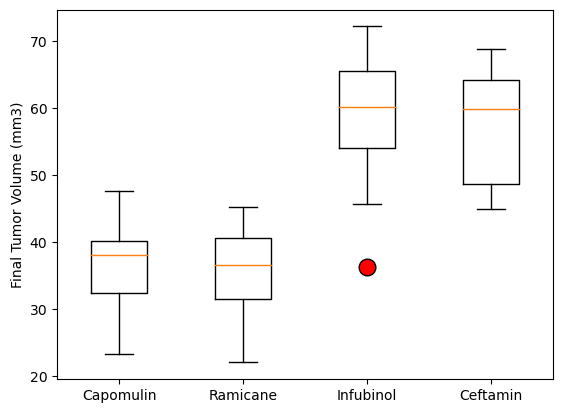

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

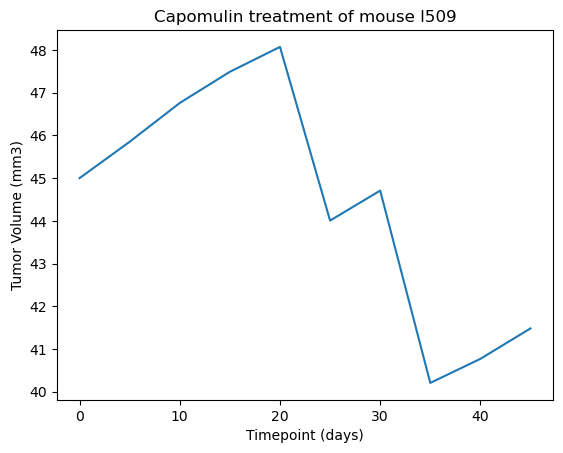

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
I509 = 

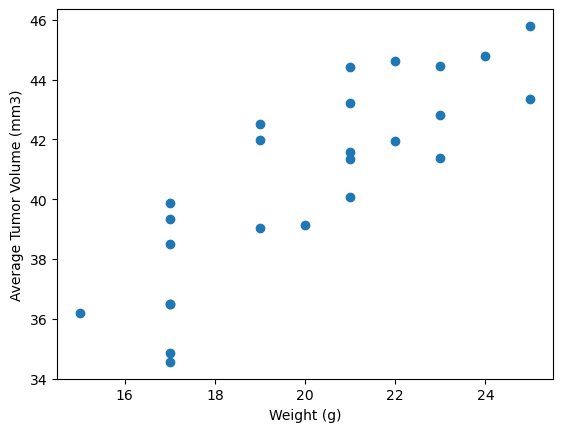

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


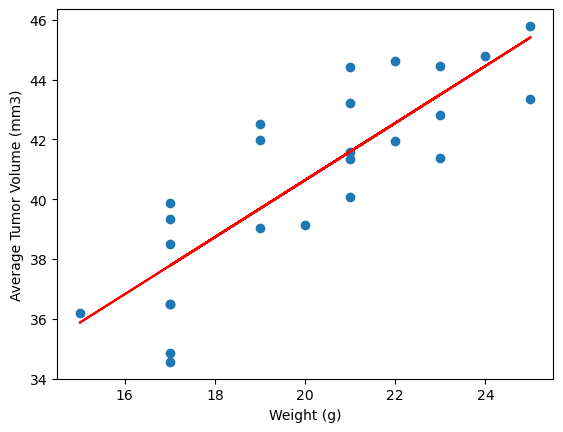

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
